In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import legend_handler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
dataSet = pd.read_csv("50_Startups.csv")
dataSet.info()
dataSet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
IndependentV = dataSet.iloc[:, :-1]
dependentV = dataSet.iloc[:, -1]

# 虛擬編碼
IndependentV = pd.get_dummies(IndependentV, columns=["State"])


IndependentV = IndependentV.iloc[0:, 0:5]

IndependentV_train, IndependentV_test, dependentV_train, dependentV_test = train_test_split(IndependentV,dependentV, test_size=0.2, random_state=0)

In [101]:
# LinearRegression auto help us feature scaling

model = LinearRegression()
model.fit(IndependentV_train, dependentV_train)
predict = model.predict(IndependentV)

for i in range(0, len(predict)):
    print(dependentV[i], predict[i])

192261.83 192919.57537462434
191792.06 189547.28196888353
191050.39 178537.48221069865
182901.99 172852.28336644758
166187.94 167921.06569568737
156991.12 161822.7226408305
156122.51 156191.10124362103
155752.6 159019.04337110667
152211.77 152787.95464272046
149759.96 152688.90677970278
146121.95 132447.73845183977
144259.4 132582.2776083114
141585.52 127528.92248422858
134307.35 127413.03373106848
132602.65 148905.98812534378
129917.04 145449.63178404563
126992.93 116571.15139253119
125370.37 131583.61511482974
124266.9 127111.48666649057
122776.86 115144.58914955391
118474.03 116212.62095132847
111313.02 119915.38726739613
110352.25 113969.4353300847
108733.99 108464.25100332094
108552.04 111255.82514062799
107404.34 102210.16391822477
105733.54 109506.72329081313
105008.31 116161.24230156509
103282.38 103015.2015977609
101004.64 102951.95967971295
99937.59 96684.7138730502
97483.56 98791.73374679356
97427.84 97535.3576194372
96778.92 95764.42320500195
96712.8 91366.21889391917
96479

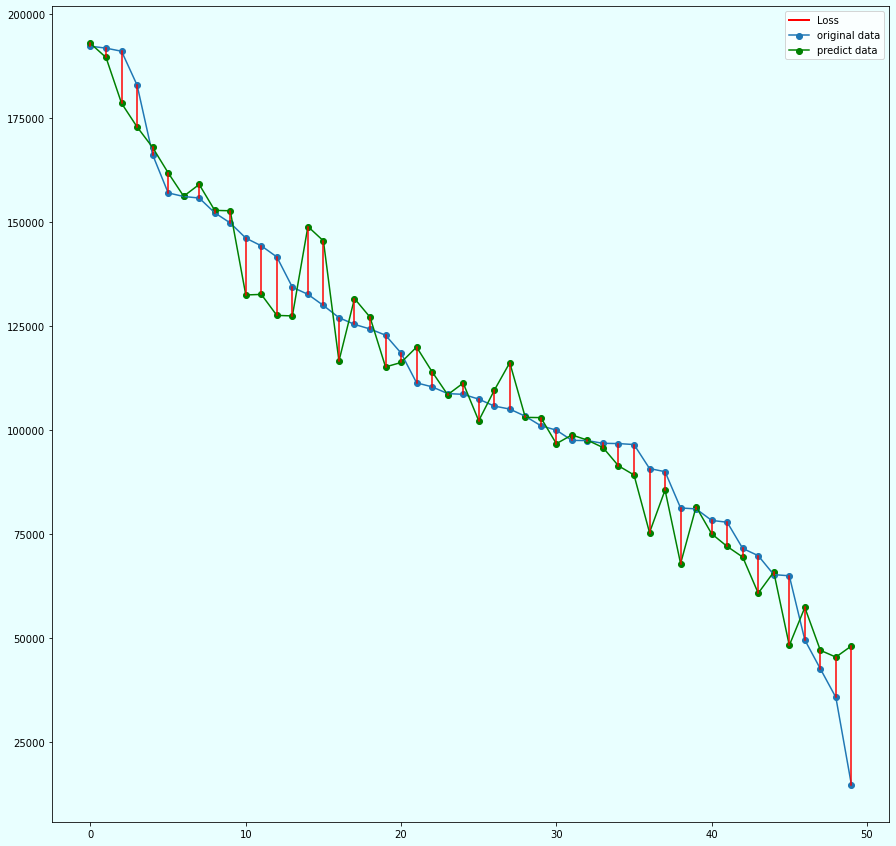

In [102]:
# Visualization the prediction result

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot()

sca01 = ax.scatter(dependentV.index, dependentV)    # label="original data"
plot01 = ax.plot(dependentV.index, dependentV)

sca02 = ax.scatter(dependentV.index, predict, color='g')    # label="predict data"
plot02 = ax.plot(dependentV.index, predict, color='g')

plot_arr=[]
for i in dependentV.index:
    plot = ax.plot([i, i], [dependentV[i], predict[i]], color='r')
    plot_arr.append(plot)


ax.legend([plot_arr, (sca01, plot01), (sca02, plot02)], ["Loss", "original data", "predict data"], handler_map={list: legend_handler.HandlerTuple()})
fig.patch.set_facecolor("#E9FFFF")
ax.set_facecolor("#E9FFFF")

In [104]:
IndependentV_train_append = np.append( arr=np.ones( (len(IndependentV_train), 1) ).astype(int), values=IndependentV_train, axis=1 )

# first
IndependentV_opt = IndependentV_train_append[:, [0,1,2,3,4,5]]
model_OLS = sm.OLS(endog=dependentV_train, exog=IndependentV_opt).fit()
model_OLS.summary()

#find the p of variables bigger than 0.05 and delete the biggest of p of variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           3.91e-21
Time:                        10:52:16   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.325e+04   8315.816      5.201      0.000    2.64e+04    6.02e+04
x1             0.7735      0.055     14.025      0.000       0.661       0.886
x2             0.0329      0.066      0.495      0.624      -0.102       0.168
x3             0.0366      0.019      1.884      0.068      -0.003       0.076
x4          -699.3691   3661.563     -0.191      0.850   -8140.560    6741.822
x5         -1658.6532   4209.221     -0.394      0.696   -1.02e+04    6895.513
==============================================================================
Omnibus:                       15.823   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.231
Skew:                          -1.094   Prob(JB):                     9.03e-06
Kurtosis:                       6.025   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# second
IndependentV_opt = IndependentV_train_append[:, [0,1,2,3,5]]
model_OLS = sm.OLS(endog=dependentV_train, exog=IndependentV_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     166.7
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           2.87e-22
Time:                        10:54:46   Log-Likelihood:                -421.12
No. Observations:                  40   AIC:                             852.2
Df Residuals:                      35   BIC:                             860.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.292e+04   8020.397      5.352      0.000    2.66e+04    5.92e+04
x1             0.7754      0.053     14.498      0.000       0.667       0.884
x2             0.0319      0.065      0.488      0.629      -0.101       0.165
x3             0.0363      0.019      1.902      0.065      -0.002       0.075
x4         -1272.1608   3639.780     -0.350      0.729   -8661.308    6116.986
==============================================================================
Omnibus:                       16.074   Durbin-Watson:                   2.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.553
Skew:                          -1.086   Prob(JB):                     4.66e-06
Kurtosis:                       6.164   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
# third
IndependentV_opt = IndependentV_train_append[:, [0,1,2,3]]
model_OLS = sm.OLS(endog=dependentV_train, exog=IndependentV_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     227.8
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.85e-23
Time:                        10:55:13   Log-Likelihood:                -421.19
No. Observations:                  40   AIC:                             850.4
Df Residuals:                      36   BIC:                             857.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.299e+04   7919.773      5.428      0.000    2.69e+04    5.91e+04
x1             0.7788      0.052     15.003      0.000       0.674       0.884
x2             0.0294      0.064      0.458      0.650      -0.101       0.160
x3             0.0347      0.018      1.896      0.066      -0.002       0.072
==============================================================================
Omnibus:                       15.557   Durbin-Watson:                   2.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.539
Skew:                          -1.081   Prob(JB):                     1.28e-05
Kurtosis:                       5.974   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# forth
IndependentV_opt = IndependentV_train_append[:, [0,1,3]]
model_OLS = sm.OLS(endog=dependentV_train, exog=IndependentV_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     349.0
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           9.65e-25
Time:                        10:56:00   Log-Likelihood:                -421.30
No. Observations:                  40   AIC:                             848.6
Df Residuals:                      37   BIC:                             853.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.635e+04   2971.236     15.598      0.000    4.03e+04    5.24e+04
x1             0.7886      0.047     16.846      0.000       0.694       0.883
x2             0.0326      0.018      1.860      0.071      -0.003       0.068
==============================================================================
Omnibus:                       14.666   Durbin-Watson:                   2.518
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.582
Skew:                          -1.030   Prob(JB):                     3.39e-05
Kurtosis:                       5.847   Cond. No.                     4.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
# fifth
IndependentV_opt = IndependentV_train_append[:, [0,1]]
model_OLS = sm.OLS(endog=dependentV_train, exog=IndependentV_opt).fit()
model_OLS.summary()

# end
# 0 -> constant, 1 -> R&D Spend

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     652.4
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.56e-25
Time:                        10:56:20   Log-Likelihood:                -423.09
No. Observations:                  40   AIC:                             850.2
Df Residuals:                      38   BIC:                             853.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.842e+04   2842.717     17.032      0.000    4.27e+04    5.42e+04
x1             0.8516      0.033     25.542      0.000       0.784       0.919
==============================================================================
Omnibus:                       13.132   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.254
Skew:                          -0.991   Prob(JB):                     0.000295
Kurtosis:                       5.413   Cond. No.                     1.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""